2025-02-11 11:44:26.966009: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
29/29 [==============================] - 1s 5ms/step - loss: 0.7111 - accuracy: 0.4703 - val_loss: 0.6357 - val_accuracy: 0.6579
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.7363 - val_loss: 0.5368 - val_accuracy: 0.8333
Epoch 3/100
29/29 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.8747 - val_loss: 0.4274 - val_accuracy: 0.8947
Epoch 4/100
29/29 [==============================] - 0s 1ms/step - loss: 0.3754 - accuracy: 0.9275 - val_loss: 0.3222 - val_accuracy: 0.8947
Epoch 5/100
29/29 [==============================] - 0s 1ms/step - loss: 0.2806 - accuracy: 0.9363 - val_loss: 0.2485 - val_accuracy: 0.9035
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 0.2275 - accuracy: 0.9341 - val_loss: 0.1966 - val_accuracy: 0.9035
Epoch 7/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1815 - accuracy: 0.9516 - val_loss: 0.1650 - val_accuracy: 0.9211
Epoch 8/100
2

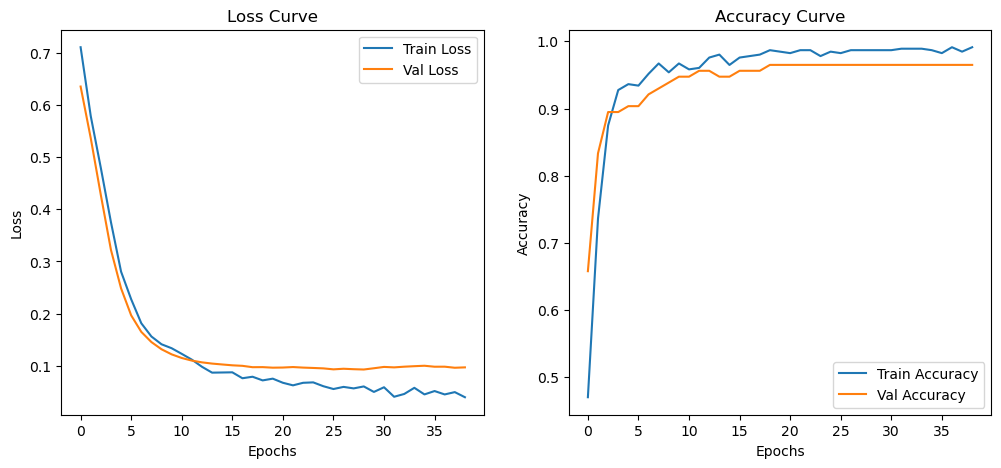

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv("10_cancer_classification.csv")

X = df.drop(columns=["benign_0__mal_1"])
y = df["benign_0__mal_1"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(16, activation='relu', input_shape=(30,)),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1, callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()
